In [131]:
# Credit Card Fraud Detection 데이터 사용
# https://www.kaggle.com/mlg-ulb/creditcardfraud

# Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
# 데이터가 불균형하기 때문에 Area Under the Precision-Recall Curve (AUPRC) 을 사용해 정확도를 측정하는 것을 추천함
# 컨퓨전매트릭을 그리는 것은 불균형 데이터에 의미있는 작업은 아님

# 참고: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [132]:
# AUPRC(정밀도 재현율 곡선 아래 영역)
# 긍적적인 예를 찾는 모델에서 불균형한 데이터를 사용할 때 유용한 매트릭 종류

In [133]:
import pandas as pd

df = pd.read_csv('D:/aidata/creditcard.csv')
# The dataset contains transactions made by credit cards in September 2013 by European cardholders
# Class 1 = fraud, 0 = otherwise

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [134]:
# null 데이터가 없다!
df.isnull().sum().max()

0

In [135]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [136]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:>

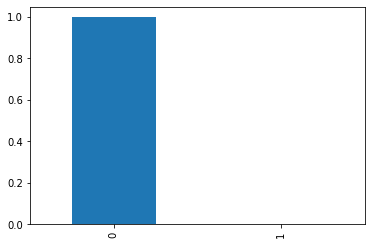

In [137]:
print(df.Class.value_counts(normalize=True)*100)
df.Class.value_counts(normalize=True).plot(kind='bar')
# 매우 불균형한 비율의 데이터

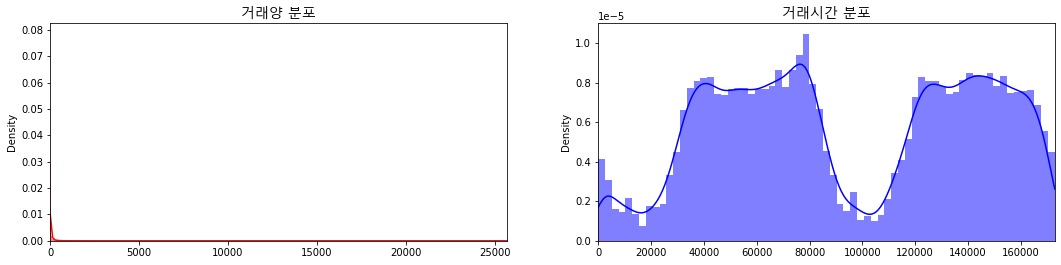

In [138]:
# amount, time 에 대한 분포도 확인하자
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf' # 한글폰트 경로 설정
fontprop = fm.FontProperties(fname=path, size=12)

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True, linewidth=0, stat="density")
ax[0].set_title('거래양 분포', fontsize=14, fontproperties=fontprop)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True, linewidth=0, stat="density")
ax[1].set_title('거래시간 분포', fontsize=14, fontproperties=fontprop)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [139]:
# 우선 어떤 전처리도 없이 모델링을 진행해보자
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    metrics(y_test, pred)
    
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test, pred, average='macro')
    print('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score: {0:.2f}, auc: {1:.2f}'.format(f1, roc_score))

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
modeling(lr, x_train, x_test, y_train, y_test)

정확도: 1.00, 정밀도: 0.73, 재현율: 0.65
f1-score: 0.69, auc: 0.82


In [141]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, x_train, x_test, y_train, y_test)

정확도: 1.00, 정밀도: 0.95, 재현율: 0.76
f1-score: 0.84, auc: 0.88


In [142]:
# 데이터 정리하고 정규화 진행
# There are no "Null" values, so we don't have to work on ways to replace values.
# Non-Fraud (99.83%), Fraud transactions occurs (017%) of the time in the dataframe.

# amount 와 time 에 스케일링 진행

In [143]:
# V 열이 PCA를 통해 만들어진 데이터이기 때문에 이미 스케일링이 진행되었을 것임.
# 그러므로 amount, time에만 스케일링을 진행
from sklearn.preprocessing import RobustScaler, StandardScaler
# RobustScaler 가 이상치에 대응하기 좋다
rob_scaler = RobustScaler()
std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [144]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(28, 'scaled_amount', scaled_amount)
df.insert(29, 'scaled_time', scaled_time)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


In [145]:
# 전처리 후에 다시 학습 진행해보자
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

modeling(lr, x_train, x_test, y_train, y_test)
print('-'*40)
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, is_unbalance=True)
modeling(lgb, x_train, x_test, y_train, y_test)

정확도: 1.00, 정밀도: 0.83, 재현율: 0.58
f1-score: 0.68, auc: 0.79
----------------------------------------
정확도: 1.00, 정밀도: 0.94, 재현율: 0.77
f1-score: 0.85, auc: 0.88


In [146]:
# SMOTE 적용
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

print(f'SMOTE 적용 전 x_train, y_train shape {x_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 x_train, y_train shape {x_train_over.shape, y_train_over.shape}')
print(f'SMOTE 적용 후 레이블 값 분포: \n{pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 x_train, y_train shape ((213605, 30), (213605,))
SMOTE 적용 후 x_train, y_train shape ((426448, 30), (426448,))
SMOTE 적용 후 레이블 값 분포: 
0    213224
1    213224
Name: Class, dtype: int64


In [147]:
# 다시 학습 진행해보자
modeling(lr, x_train_over, x_test, y_train_over, y_test)
print('-'*40)
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, is_unbalance=True)
modeling(lgb, x_train_over, x_test, y_train_over, y_test)

정확도: 0.98, 정밀도: 0.07, 재현율: 0.87
f1-score: 0.12, auc: 0.93
----------------------------------------
정확도: 0.92, 정밀도: 0.02, 재현율: 0.85
f1-score: 0.03, auc: 0.88
